<a href="https://colab.research.google.com/github/usamaamjadarain/fastai2.ipython/blob/main/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STOCHASTIC GRADIENT **DESCENT**

In [ ]:
# Run ones per session..
!pip install fastai -q --upgrade

Grab the related library we will need

In [ ]:
from fastai.basics import *

Stochastic Gradient Descent (SGD):

1.   Optimization technique (optimizer)
2.   Commonly used in neural networks


1.  Example with linear regression





# Linear Regression

fit a line of 100 points

In [ ]:
n = 100

Generate our Data

In [ ]:
x = torch.ones(n,2)

In [ ]:
len(x)

100

In [ ]:
x[:5]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

Randomize it is in a uniform distribution..

In [ ]:
x[:,0].uniform_(-1. ,1)
x[:5] , x.shape

(tensor([[ 0.1752,  1.0000],
         [ 0.8289,  1.0000],
         [ 0.2593,  1.0000],
         [-0.7244,  1.0000],
         [-0.2583,  1.0000]]), torch.Size([100, 2]))



1.   Any linear model is y=mx+b
2.   m, x, and b are matrices
3.  We have x





In [ ]:
m = tensor(3.,2); m, m.shape

(tensor([3., 2.]), torch.Size([2]))

B is  a Random Bias

In [ ]:
b = torch.rand(n)

In [ ]:
b[:5]

tensor([0.7271, 0.7144, 0.0868, 0.3806, 0.4212])

In [ ]:
b.shape

torch.Size([100])

# Now we can make our y

Matrix Multiplication is denoted by @

In [ ]:
y = x@m + b

In [ ]:
y

tensor([ 3.2528e+00,  5.2012e+00,  2.8647e+00,  2.0756e-01,  1.6462e+00,
         3.7503e+00,  2.3456e+00,  3.7568e-01,  4.0657e+00,  8.8763e-01,
         4.3481e+00,  5.3831e+00, -7.3013e-01, -4.3566e-02,  4.7625e+00,
         6.1464e-01,  1.2872e-03,  5.0359e+00,  4.0522e+00,  9.9434e-01,
         4.0700e+00,  1.7915e+00,  4.7657e+00,  2.0938e+00,  9.8010e-02,
         4.8411e+00,  1.4673e+00,  3.0858e+00,  2.6410e+00,  8.8985e-01,
         1.7610e+00,  1.5790e+00,  2.6999e+00,  3.0318e+00,  5.7277e+00,
         2.4948e-01,  4.1039e+00,  3.2644e+00,  2.7033e+00,  9.3587e-01,
         5.2759e+00,  3.9660e+00,  1.6846e+00,  3.6305e-01,  9.8451e-02,
         4.9074e+00,  5.0909e+00,  3.1899e+00,  4.3973e+00,  1.7753e+00,
         3.4880e+00,  2.8203e+00,  2.8453e+00,  3.5619e+00,  3.2296e+00,
         2.7307e+00,  4.3028e+00,  4.1924e+00, -6.1586e-01,  1.0538e+00,
         2.2071e+00,  3.2705e+00,  5.1264e+00,  9.9947e-01,  5.5740e+00,
         1.4688e+00,  3.4333e+00,  4.5342e+00,  4.7

In [ ]:
m@x +b

RuntimeError: ignored

PLOT OUR RESULTS..

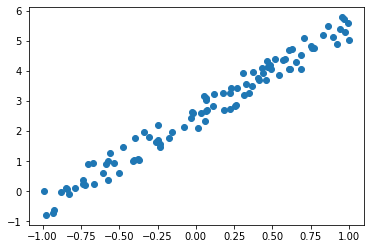

In [ ]:
plt.scatter(x[:,0],y)

Our weights from last lesson should minimize the distance between points and our line.


1.   mean squared error: Take distance from pred and y, square, then average



In [ ]:
def mse(y_hat,y):return ((y_hat-y)**2).mean()

We are run our model we are trying to predict m
for example , say a=(0.5,0.75)


1.   Make a prediction
2.   Calculate the error



In [ ]:
a = tensor(.5,.75)

In [ ]:
a

tensor([0.5000, 0.7500])

Make prediction

In [ ]:
y_pred = x@a

In [ ]:
y_pred

tensor([0.8376, 1.1645, 0.8797, 0.3878, 0.6208, 0.9523, 0.7791, 0.3830, 1.0533,
        0.4576, 1.0337, 1.2194, 0.2843, 0.3097, 1.1277, 0.4473, 0.2551, 1.2483,
        0.9959, 0.4622, 1.0573, 0.5986, 1.1367, 0.7568, 0.3541, 1.1273, 0.6320,
        0.7833, 0.7387, 0.3989, 0.6633, 0.6331, 0.8431, 0.7827, 1.2333, 0.4183,
        0.9666, 0.9244, 0.7877, 0.4824, 1.2382, 0.9366, 0.6270, 0.4628, 0.3280,
        1.2119, 1.1026, 0.9087, 1.0074, 0.5513, 0.9346, 0.8770, 0.8050, 0.9125,
        0.8105, 0.8613, 1.0762, 0.9931, 0.2860, 0.5599, 0.6277, 0.8599, 1.1974,
        0.5463, 1.2474, 0.5122, 0.8838, 1.0927, 1.0639, 1.0552, 0.8652, 0.9577,
        1.0215, 0.7765, 0.5494, 0.7681, 0.9043, 0.9781, 0.7829, 0.3825, 0.6711,
        0.5634, 0.4141, 0.4994, 1.1822, 1.0412, 0.9678, 1.2261, 0.7113, 0.7356,
        0.3284, 0.9857, 0.9828, 1.0933, 0.2610, 0.9839, 0.3368, 0.5795, 0.7392,
        0.4701])

CALCULATE ERROR

In [ ]:
mse(y_pred,y)

tensor(5.9290)

What does that mean? Let's plot it

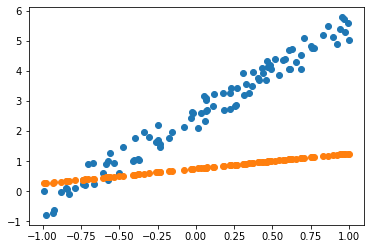

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_pred)

What does that mean? Let's plot it
# Walking down Gradient Descent




1.   Goal: Minimize the loss function (mse)
2.   Gradient Descent:

1.   Starts with parameters
2.   Moves towards new parameters to minimize the function

1.   Take steps in the negative direction of gradient function









In [ ]:
# first lets make the parameters..

a = nn.Parameter(a)

In [ ]:
a

Parameter containing:
tensor([0.5000, 0.7500], requires_grad=True)

Next let's create an update function to check if the current a improved. If so, move even closer.
We'll print out every 10 iterations to see how we are doing

In [ ]:
def update():
  y_hat= x@a
  loss = mse(y,y_hat)
  if i %10==0:
    print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr* a.grad)
    a.grad.zero_()



*   torch.no_grad: No back propogation (no updating of our weights)
*   sub_: Subtracts some value (lr * our gradient)

*   grad.zero_: Zeros our gradients





In [ ]:
lr = 1e-1

In [ ]:
for i in range(100):update()

tensor(5.9290, grad_fn=<MeanBackward0>)
tensor(0.3808, grad_fn=<MeanBackward0>)
tensor(0.1611, grad_fn=<MeanBackward0>)
tensor(0.1020, grad_fn=<MeanBackward0>)
tensor(0.0860, grad_fn=<MeanBackward0>)
tensor(0.0816, grad_fn=<MeanBackward0>)
tensor(0.0804, grad_fn=<MeanBackward0>)
tensor(0.0801, grad_fn=<MeanBackward0>)
tensor(0.0800, grad_fn=<MeanBackward0>)
tensor(0.0800, grad_fn=<MeanBackward0>)


Now let's see how this new a compares.


1.   Detach removes all gradients



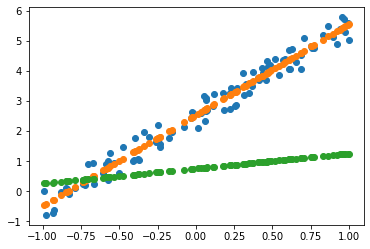

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],(x@a).detach())
plt.scatter(x[:,0],y_pred)

# Animate the process

In [ ]:
from matplotlib import animation,rc
rc('animation', html = 'jshtml')

Let's redo the process and animate our y closing in

In [ ]:
a = nn.Parameter(tensor(.5 ,.75));a

Parameter containing:
tensor([0.5000, 0.7500], requires_grad=True)

We'll want to set a new y to our x@a

In [ ]:
def animate(i):
  update()
  line.set_ydata((x@a).detach())
  return line,

let's create  a   base image

In [ ]:
fig  = plt.figure()
plt.scatter(x[:,0],y,c='orange')
line, = plt.plot(x[:,0],(x@a).detach())
plt.close()

# AND ANIMATE

In [ ]:
animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)